# Computer Vision



Select an RGB image of your choosing from somewhere on the internet. 

Import the image and display it.

In [1]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 7.4MB/s 


In [7]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())


key = upload_files()

Saving alfred-leung-332452-unsplash.jpg to alfred-leung-332452-unsplash (2).jpg


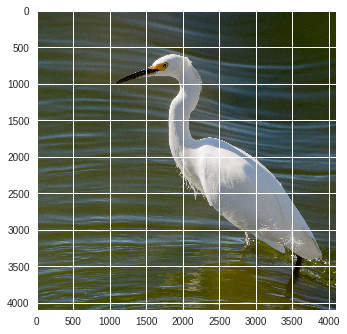

In [8]:
# Convolution in action
import imageio
import matplotlib.pyplot as plt

I = imageio.imread('alfred-leung-332452-unsplash.jpg')
plt.imshow(I)


Generate a grayscale version of the image and display it again.

(4096, 4096)


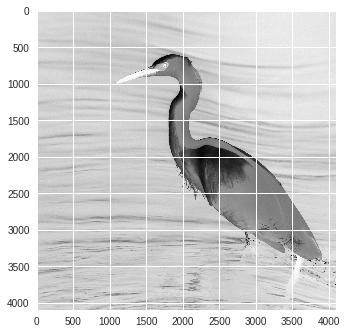

In [9]:
import numpy as np
import scipy.ndimage as nd

# Convert I to grayscale, so it will be MxNx1 instead of MxNx4
from skimage import color
I_g = color.rgb2gray(I)
print(I_g.shape)
plt.imshow(I_g)

Use Canny Edge Detection to find the edges in the image. Display the Canny Edge Detection image. 

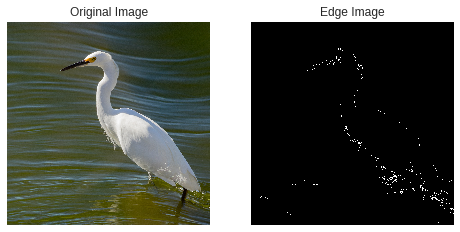

In [19]:
import cv2
import os
edges = cv2.Canny(I,10,300)

plt.subplot(121),plt.imshow(I,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

Compute the convolution of the image with the following Difference of Gaussian (DoG) filter: 

In [0]:
dog_filter = np.array([[1,1,1,1,1],[1,-3,-3,-3,1],[1,-3,8,-3,1],[1,-3,-3,-3,1],[1,1,1,1,1]])

import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import pylab
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 4, image.shape[1] + 4))   
    image_padded[2:-2, 2:-2] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+5,x:x+5]).sum()        
    return output

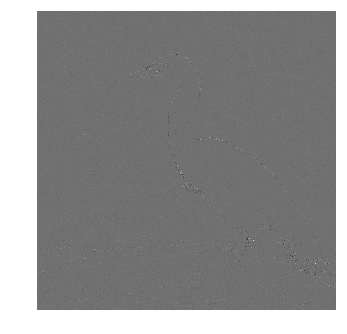

In [23]:
plt.imshow(convolve2d(I_g,dog_filter))
plt.axis('off')
plt.show()

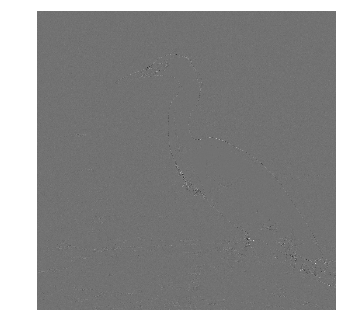

In [25]:
C = nd.convolve(I_g,dog_filter)
plt.axis('off')
plt.imshow(C)

# Deep Convolutional Neural Networks



Use the softmax function to transform the following vector to probability values:

$\begin{bmatrix}
4&5&9&2
\end{bmatrix}$

In [27]:

z = np.array([4.0, 5.0, 9.0, 2.0])

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis = 0)
  
print (softmax(z))

[6.56742084e-03 1.78521007e-02 9.74691675e-01 8.88803760e-04]


Use the Keras library to classify the images of the MNIST-fashion dataset using a simple convolutional neural network. This dataset is just like MNIST but has grayscale images of different articles of clothing. It also has 10 classes, so any code that works on the MNIST dataset should work on this dataset without modification. I'll help you with the image preparation, and will limit the number of classes to 2 for fast training times. We will focus only on classifying pullovers and shirts.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# What are the dimensions of a single image?
print(x_train[0].shape)

# input image dimensions
img_rows, img_cols = 28,28

fig = plt.figure(figsize=(8,3))

if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
print(K.image_data_format())

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Only look at 2s and 6s
num_classes = 2

# Create boolean arrays for train and test
train_picks = np.logical_or(y_train==2,y_train==6)
test_picks = np.logical_or(y_test==2,y_test==6)

# Filter train and test based on boolean arrays
x_train = x_train[train_picks]
x_test = x_test[test_picks]
y_train = np.array(y_train[train_picks]==2,dtype=int)
y_test = np.array(y_test[test_picks]==2,dtype=int)

# Scale pixel values to be floats between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

(28, 28)
channels_first
x_train shape: (12000, 1, 28, 28)
12000 train samples
2000 test samples


Plot your validation and test accuracies by epoch.

In [0]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

np.random.seed(42)

In [43]:
batch_size = 32
epochs = 50

fitted_model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 12000 samples, validate on 2000 samples
Epoch 1/50
12000/12000 [==============================] - 3s 267us/step - loss: 0.2515 - acc: 0.9015 - val_loss: 0.2351 - val_acc: 0.9085
Epoch 2/50
12000/12000 [==============================] - 3s 275us/step - loss: 0.2487 - acc: 0.9019 - val_loss: 0.2304 - val_acc: 0.8990
Epoch 3/50
12000/12000 [==============================] - 3s 277us/step - loss: 0.2438 - acc: 0.9040 - val_loss: 0.2245 - val_acc: 0.9055
Epoch 4/50
12000/12000 [==============================] - 4s 353us/step - loss: 0.2396 - acc: 0.9054 - val_loss: 0.2224 - val_acc: 0.9065
Epoch 5/50
 1952/12000 [===>..........................] - ETA: 3s - loss: 0.2249 - acc: 0.9093

12000/12000 [==============================] - 4s 340us/step - loss: 0.2340 - acc: 0.9054 - val_loss: 0.2250 - val_acc: 0.9070
Epoch 6/50
12000/12000 [==============================] - 4s 339us/step - loss: 0.2313 - acc: 0.9069 - val_loss: 0.2198 - val_acc: 0.9075
Epoch 7/50
12000/12000 [==============================] - 4s 327us/step - loss: 0.2236 - acc: 0.9127 - val_loss: 0.2242 - val_acc: 0.9025
Epoch 8/50
12000/12000 [==============================] - 4s 325us/step - loss: 0.2240 - acc: 0.9129 - val_loss: 0.2446 - val_acc: 0.9010
Epoch 9/50
 5152/12000 [===========>..................] - ETA: 2s - loss: 0.2210 - acc: 0.9125

12000/12000 [==============================] - 4s 312us/step - loss: 0.2261 - acc: 0.9103 - val_loss: 0.2241 - val_acc: 0.9075
Epoch 10/50
12000/12000 [==============================] - 4s 304us/step - loss: 0.2246 - acc: 0.9132 - val_loss: 0.2212 - val_acc: 0.9055
Epoch 11/50
12000/12000 [==============================] - 4s 307us/step - loss: 0.2215 - acc: 0.9153 - val_loss: 0.2232 - val_acc: 0.9045
Epoch 12/50
12000/12000 [==============================] - 4s 316us/step - loss: 0.2170 - acc: 0.9167 - val_loss: 0.2158 - val_acc: 0.9110
Epoch 13/50
 6848/12000 [================>.............] - ETA: 1s - loss: 0.2172 - acc: 0.9153

12000/12000 [==============================] - 4s 324us/step - loss: 0.2128 - acc: 0.9203 - val_loss: 0.2102 - val_acc: 0.9120
Epoch 14/50
12000/12000 [==============================] - 4s 324us/step - loss: 0.2146 - acc: 0.9157 - val_loss: 0.2118 - val_acc: 0.9135
Epoch 15/50
12000/12000 [==============================] - 4s 352us/step - loss: 0.2118 - acc: 0.9176 - val_loss: 0.2145 - val_acc: 0.9110
Epoch 16/50
12000/12000 [==============================] - 5s 393us/step - loss: 0.2157 - acc: 0.9180 - val_loss: 0.2124 - val_acc: 0.9125
Epoch 17/50
 4384/12000 [=========>....................] - ETA: 2s - loss: 0.2011 - acc: 0.9215

12000/12000 [==============================] - 3s 282us/step - loss: 0.2084 - acc: 0.9185 - val_loss: 0.2135 - val_acc: 0.9095
Epoch 18/50
12000/12000 [==============================] - 3s 275us/step - loss: 0.2094 - acc: 0.9182 - val_loss: 0.2174 - val_acc: 0.9090
Epoch 19/50
12000/12000 [==============================] - 3s 274us/step - loss: 0.2043 - acc: 0.9202 - val_loss: 0.2115 - val_acc: 0.9135
Epoch 20/50
12000/12000 [==============================] - 3s 275us/step - loss: 0.2041 - acc: 0.9199 - val_loss: 0.2182 - val_acc: 0.9085
Epoch 21/50
 9024/12000 [=====================>........] - ETA: 0s - loss: 0.2024 - acc: 0.9215

12000/12000 [==============================] - 4s 311us/step - loss: 0.2018 - acc: 0.9223 - val_loss: 0.2108 - val_acc: 0.9060
Epoch 22/50
12000/12000 [==============================] - 3s 281us/step - loss: 0.2013 - acc: 0.9198 - val_loss: 0.2120 - val_acc: 0.9135
Epoch 23/50
12000/12000 [==============================] - 3s 280us/step - loss: 0.1998 - acc: 0.9230 - val_loss: 0.2286 - val_acc: 0.9055
Epoch 24/50
12000/12000 [==============================] - 3s 274us/step - loss: 0.2018 - acc: 0.9222 - val_loss: 0.2089 - val_acc: 0.9115
Epoch 25/50
11008/12000 [==========================>...] - ETA: 0s - loss: 0.1995 - acc: 0.9193

12000/12000 [==============================] - 3s 272us/step - loss: 0.1976 - acc: 0.9205 - val_loss: 0.2145 - val_acc: 0.9165
Epoch 26/50
12000/12000 [==============================] - 3s 282us/step - loss: 0.1954 - acc: 0.9223 - val_loss: 0.2120 - val_acc: 0.9135
Epoch 27/50
12000/12000 [==============================] - 3s 277us/step - loss: 0.1973 - acc: 0.9232 - val_loss: 0.2323 - val_acc: 0.9100
Epoch 28/50
12000/12000 [==============================] - 3s 275us/step - loss: 0.1984 - acc: 0.9243 - val_loss: 0.2101 - val_acc: 0.9160
Epoch 29/50
10848/12000 [==========================>...] - ETA: 0s - loss: 0.1903 - acc: 0.9267

12000/12000 [==============================] - 3s 275us/step - loss: 0.1928 - acc: 0.9253 - val_loss: 0.2208 - val_acc: 0.9110
Epoch 30/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.2014 - acc: 0.9243 - val_loss: 0.2044 - val_acc: 0.9115
Epoch 31/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.1899 - acc: 0.9264 - val_loss: 0.2106 - val_acc: 0.9115
Epoch 32/50
12000/12000 [==============================] - 3s 279us/step - loss: 0.1940 - acc: 0.9255 - val_loss: 0.2095 - val_acc: 0.9210
Epoch 33/50
10528/12000 [=========================>....] - ETA: 0s - loss: 0.1956 - acc: 0.9226

12000/12000 [==============================] - 3s 280us/step - loss: 0.1962 - acc: 0.9224 - val_loss: 0.2112 - val_acc: 0.9130
Epoch 34/50
12000/12000 [==============================] - 3s 281us/step - loss: 0.1905 - acc: 0.9248 - val_loss: 0.2089 - val_acc: 0.9150
Epoch 35/50
12000/12000 [==============================] - 3s 276us/step - loss: 0.1976 - acc: 0.9213 - val_loss: 0.2115 - val_acc: 0.9180
Epoch 36/50
12000/12000 [==============================] - 3s 274us/step - loss: 0.1890 - acc: 0.9273 - val_loss: 0.2064 - val_acc: 0.9145
Epoch 37/50
10880/12000 [==========================>...] - ETA: 0s - loss: 0.1969 - acc: 0.9222

12000/12000 [==============================] - 3s 277us/step - loss: 0.1960 - acc: 0.9224 - val_loss: 0.2068 - val_acc: 0.9115
Epoch 38/50
12000/12000 [==============================] - 3s 273us/step - loss: 0.1837 - acc: 0.9298 - val_loss: 0.2241 - val_acc: 0.9115
Epoch 39/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.1935 - acc: 0.9272 - val_loss: 0.2149 - val_acc: 0.9135
Epoch 40/50
12000/12000 [==============================] - 3s 280us/step - loss: 0.1920 - acc: 0.9265 - val_loss: 0.2181 - val_acc: 0.9165
Epoch 41/50
10944/12000 [==========================>...] - ETA: 0s - loss: 0.1893 - acc: 0.9269

12000/12000 [==============================] - 3s 279us/step - loss: 0.1885 - acc: 0.9270 - val_loss: 0.2101 - val_acc: 0.9180
Epoch 42/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.1884 - acc: 0.9267 - val_loss: 0.2117 - val_acc: 0.9215
Epoch 43/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.1872 - acc: 0.9291 - val_loss: 0.2347 - val_acc: 0.9135
Epoch 44/50
12000/12000 [==============================] - 3s 284us/step - loss: 0.1899 - acc: 0.9277 - val_loss: 0.2194 - val_acc: 0.9150
Epoch 45/50
10112/12000 [========================>.....] - ETA: 0s - loss: 0.1828 - acc: 0.9304

12000/12000 [==============================] - 3s 281us/step - loss: 0.1865 - acc: 0.9295 - val_loss: 0.2293 - val_acc: 0.9125
Epoch 46/50
12000/12000 [==============================] - 3s 283us/step - loss: 0.1926 - acc: 0.9274 - val_loss: 0.2192 - val_acc: 0.9200
Epoch 47/50
12000/12000 [==============================] - 3s 281us/step - loss: 0.1879 - acc: 0.9269 - val_loss: 0.2160 - val_acc: 0.9195
Epoch 48/50
12000/12000 [==============================] - 3s 280us/step - loss: 0.1837 - acc: 0.9302 - val_loss: 0.2259 - val_acc: 0.9200
Epoch 49/50
10304/12000 [========================>.....] - ETA: 0s - loss: 0.1847 - acc: 0.9291

12000/12000 [==============================] - 3s 276us/step - loss: 0.1852 - acc: 0.9287 - val_loss: 0.2398 - val_acc: 0.9160
Epoch 50/50
12000/12000 [==============================] - 3s 278us/step - loss: 0.1867 - acc: 0.9304 - val_loss: 0.2269 - val_acc: 0.9180


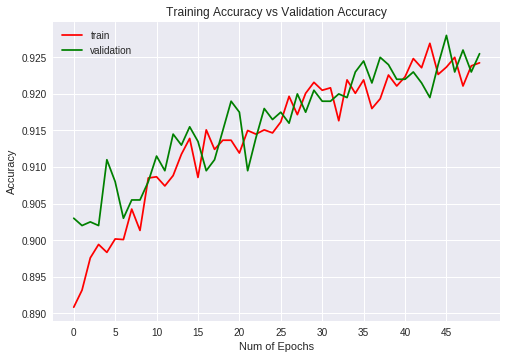

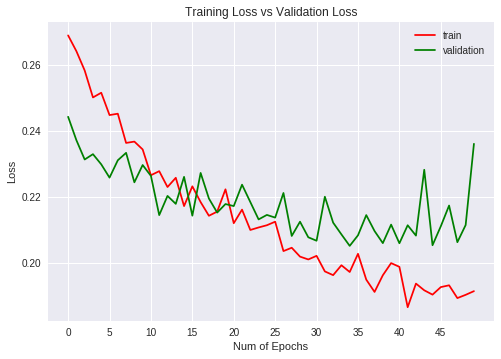

Accuracy: 92.55%


In [35]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(fitted_model.history['acc'],'r')
plt.plot(fitted_model.history['val_acc'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(fitted_model.history['loss'],'r')
plt.plot(fitted_model.history['val_loss'],'g')
plt.xticks(np.arange(0, 50, 5))
#plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### If you have time left over, go start a blog post about one specific Deep Learning-related topic that you would like to understand better. Possible Ideas:

Input Dimensions - RGB vs Grayscale, Channels First, vs Channels Last.

Convolutional Layers - How are they calculated? How to use padding to preserve layer dimensions?

Why does Relu Activation outperform other types of activation for CNNs?

Max Pooling vs Average Pooling? Why is max pooling better? Why pass on the highest value?

How does backpropagation work in CNNs?

Hyperparameter Tuning CNNs

Picking optimal Batch Size

Picking the optimal Number of Filters / kernel size

Brief History of Computer Vision

Summary of Most impactful CNN Architectures i.e. LeNet, AlexNet, ResNet, GoogleNet, etc. 

Matrices for Image Filtering

Edge Detection Methods

Keras vs Tensorflow

### There are so many things that you could write about!!




